# Correlation Analysis

Correlation refers to the degree to which two variables are associated or related with each other. Many statistical models operate under the assumption that your features (variables) are independent of each other, so we must statistically check whether this is true. We'll walk through some examples to get a better understanding of it.

# PART 1
## Let's first start by creating a random dataset (we'll work with the heating oil company case later in this notebook)

In [115]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Setting a seed so the example is reproducible 
np.random.seed(42)

# Create a pandas data frame named df containing random mumbers between 0 and 50 in 10 rows and 2 columns
# This random data represents how many times a specific ad link was clicked and the corresponding purchases made

df = pd.DataFrame(np.random.randint(0,50, size= (10, 2)), 
                  columns= ['ad_clicks', 'products_purchased']) 

In [116]:
df

,ad_clicks,products_purchased
0,38,28
1,14,42
2,7,20
3,38,18
4,22,10
5,10,23
6,35,39
7,23,2
8,21,1
9,23,43


## Correlation
Correlation measures a linear relationship between two features, most commonly using Pearson's Correlation Coefficient as the test metric. 

We can calculate correlation as: 
 ![correlation.png](attachment:correlation.png)

The correlation is basically just a standardized version of the covariance where we are dividing the sum of difference by the product of each feature's standard deviation. 

### Properties of Correlation
Dividing the standard deviation standardizes the results to a range between -1 and 1, with: 
- -1 meaning that there is a strong negative relationship when one feature goes up, the other goes down
- +1 meaning that there is a strong positive relationshipo between features, whene one goes up, the other goes up
- 0, as with covariance, means there is no relationship
- If the features have been normalized, covariance and correlation are equal

We can calculate this in python as: 

In [117]:
df[['ad_clicks', 'products_purchased']].corr()

,ad_clicks,products_purchased
ad_clicks,1.000000,0.081661
products_purchased,0.081661,1.000000


In [118]:
# Also, we can calculate correlation using the corr() function with the data frame

df.corr()

,ad_clicks,products_purchased
ad_clicks,1.000000,0.081661
products_purchased,0.081661,1.000000


### Correlation Matrix
The above correlation matrix shows that a variable is perfectly correlated with itself at a value of 1, and very weakly correlated with the other feature with an R^2 (Pearon's Correlation Coeff) of .08. 

We can also create a heatmap of the correlation, which in larger datasets makes the relationships easier to see: 

In [119]:
df.corr().style.background_gradient(cmap='coolwarm')

,ad_clicks,products_purchased
ad_clicks,1.000000,0.081661
products_purchased,0.081661,1.000000


A better visualization method is to import a popular plotting package called seaborn and plot the output of the correlation matrix: 

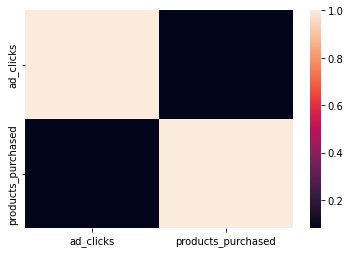

In [120]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

The legend shows us that the colors will be darker with a stronger relationship, and lighter with a weaker relationship 

### Interpreting Correlation
Another quick way to view the correlation between two variables is to create a scatterplot. Similar data points should cluster together, and if there is a relationship between two variables, we should see the points grouping together in some kind of pattern: 
![corr_scatter%20copy.png](attachment:corr_scatter%20copy.png)

The top row of this diagram from [Wikipedia](http://wikipedia.org/wiki/Correlation_and_dependence) shows linear relationships with differing correlation coefficients. The second row shows perfect correlations, and the third shows variables that are clearly related but non-linear (aka not a good dataset for linear regression). 

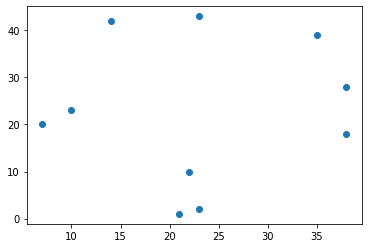

In [121]:
# scatter plot for our data frame, df

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.ad_clicks, df.products_purchased)

Above we can clearly see three sets of points clustering together, with two outliers near the top. We can also see that this dataset probably doesn't contain enough samples to answer any real questions. 

# PART 2 - Homework
## Correlation Analysis for the Heating Oil Company
### This business cases deonstartes how a heating oil company explores relationships between variables related to heating oil consumption. The goal of the company from this analysis, combined with additional analyses is to forecast heating oil demand for the upcoming season so it can prepare for it.

<ins>Source of the case</ins>: **Data Mining for the Masses**, by Matthew North: https://rapidminer.com/resource/data-mining-masses/

<ins>Data Files</ins>: https://sites.google.com/site/dataminingforthemasses/

## The Case:
#### Sarah is a regional sales manager for a nationwide supplier of fossil fuels for home heating. Recent volatility in market prices for heating oil specifically, coupled with wide variability in the size of each order for home heating oil, has Sarah concerned. She feels a need to understand the types of behaviors and other factors that may influence the demand for heating oil in the domestic market. What factors are related to heating oil usage, and how might she use a knowledge of such factors to better manage her inventory, and anticipate demand? Sarah believes that data mining can help her begin to formulate an understanding of these factors and interactions.

#### After completing this exercise , you should be able to:

- Explain what correlation is, and what it isn’t.
- Develop a correlation model using Python.
- Interpret the coefficients in a correlation matrix and explain their significance, if any.

### Orgnazional Understanding
#### Sarah’s goal is to better understand how her company can succeed in the home heating oil market. She recognizes that there are many factors that influence heating oil consumption, and believes that by investigating the relationship between a number of those factors, she will be able to better monitor and respond to heating oil demand. She has selected correlation as a way to model the relationship between the factors she wishes to investigate. Correlation is a statistical measure of how strong the relationships are between attributes in a data set.

### Data Understanding
#### In order to investigate her question, Sarah has enlisted our help in creating a correlation matrix of six attributes. Working together, using Sarah’s employer’s data resources which are primarily drawn from the company’s billing database, we create a data set comprised of the following attributes:
- **Insulation:** This is a density rating, ranging from one to ten, indicating the thickness of each home’s insulation. A home with a density rating of one is poorly insulated, while a home with a density of ten has excellent insulation.
- **Temperature:** This is the average outdoor ambient temperature at each home for the most recent year, measure in degree Fahrenheit.
- **Heating_Oil:** This is the total number of units of heating oil purchased by the owner of each home in the most recent year.
- **Num_Occupants:** This is the total number of occupants living in each home.
- **Avg_Age:** This is the average age of those occupants.
- **Home_Size:** This is a rating, on a scale of one to eight, of the home’s overall size. The higher the number, the larger the home.

## Data Analysis

### (Step 1) Add a markdown/text cell below in which you should write your full name (properly formatted)

In [122]:
# Kevin Galvan Serrano

### (Step 2 )Load the data file

In [123]:
# Now let's create another data frame (df2)for the heating oil example data
# The data file, heating_oil.csv is located on my desktop in data folder
# You should adjust the path to the data file on your computer as necessary

df2 = pd.read_csv('/content/heating_oil.csv')

###  (Step 3) Add as many code cells below as necessary to show heating oil data frame's top five rows, data types, size, and descriptive statistics

In [124]:
# Top 5 rows in data frame
df2.head()

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2


In [125]:
# How many rows and columns in the data set
df2.shape

(1218, 6)

In [126]:
# What data types are in the data set
df2.dtypes

Insulation         int64
Temperature        int64
Heating_Oil        int64
Num_Occupants      int64
Avg_Age          float64
Home_Size          int64
dtype: object

In [127]:
# What data types have missing values in the dataset?
missing = df2.isnull().sum().sort_values(ascending=False)
missing

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

In [128]:
# Size of the data frame
df2.size

7308

### (Step 4)  Add a code cell below in which you should write and run the code to create a scatter plot with any two or three variables from the heating oil data frame

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue, size. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


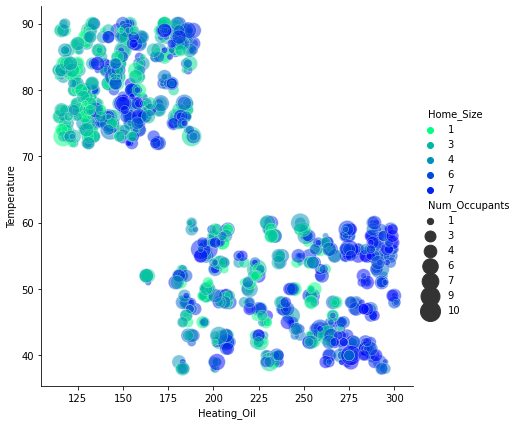

In [129]:
x = "Heating_Oil"
y="Temperature"
size = "Num_Occupants"
hue = "Home_Size"
sns.relplot(x, y, hue, size,
            sizes=(40, 400), alpha=.5, palette="winter_r",
            height=6, data=df2)

### (Step 5) Add a code cell below in which you should write and run the code to create correlation matrix for the heating oil data variables

In [130]:
# Remove the ID column
df2 = df2[["Insulation", "Temperature", "Heating_Oil", "Num_Occupants", "Avg_Age", "Home_Size"]]

# Create a correlation table
df2_corr = df2.corr(method='pearson')
df2_corr

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
Insulation,1.000000,-0.793696,0.736097,-0.012567,0.642982,0.200712
Temperature,-0.793696,1.000000,-0.773660,0.012519,-0.672579,-0.213939
Heating_Oil,0.736097,-0.773660,1.000000,-0.041635,0.847891,0.381191
Num_Occupants,-0.012567,0.012519,-0.041635,1.000000,-0.048034,-0.022534
Avg_Age,0.642982,-0.672579,0.847891,-0.048034,1.000000,0.306557
Home_Size,0.200712,-0.213939,0.381191,-0.022534,0.306557,1.000000


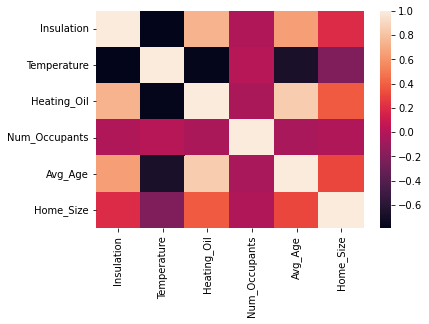

In [131]:
sns.heatmap(df2_corr,xticklabels=df2_corr.columns,
            yticklabels=df2_corr.columns)

### (Step 6) Add a Markdown or Text cell below tin which you should please write formatted text to answer the following questions: (1) How do you interpret correlation between insulation and heating oil usage? (2) Why do you think there's a positive correlation between these two variables?

In [132]:
# 1) The correlation between insulation and heating oil usage is relatively high at 0.736097
# 2) There is a positive correlation between these two variables because in general, a house with a higher insulation will require less heating oil in order to heat up the entire house. Therefore resulting in a positive correlation.